In [1]:
from tensorflow.keras import datasets
from keras.utils import np_utils
# 데이터 준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(y_train[:5])
# one hot encoding
y_train = np_utils.to_categorical(y_train)
print(y_train[:5])
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape
# reshape 차원 변경/-1 샘플의 개수
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
# 분류 DNN 모델 구현 함수
def make_model(input_number, layers, output_number):
    # 모델 초기화
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,), name='Hidden-1'))
    model.add(Dense(layers[1], activation='relu', name='Hidden-2'))
    model.add(Dense(layers[2], activation='relu', name='Hidden-3'))
    # 드롭아웃 계층 Dropout(p) p라는 확률로
    # 출력 노드의 신호를 보내다 말다 함, 과적합 방지
    model.add(Dropout(0.2))
    # Dense(출력노드수, input_shape=(변수개수))
    # model.add(Dense(layers[0], activation='relu', input_shape=(input_number, )))
    # model.add(Dense(layers[1], activation='relu'))
    # model.add(Dense(layers[2], activation='relu'))
    # model.add(Dense(0.2))
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [3]:
input_number = 784 # 28x28
# 은닉계층 3개, 은닉노드수 128개, 64개, 32개
hidden_layers = [128, 64, 32]
print(hidden_layers)
number_of_class = 10
output_number = number_of_class
# 모델 생성
model = make_model(input_number, hidden_layers, output_number)


[128, 64, 32]


In [4]:
# 모델 학습
hist = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.5305 - accuracy: 0.8404 - val_loss: 0.1761 - val_accuracy: 0.9499
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1974 - accuracy: 0.9448 - val_loss: 0.1413 - val_accuracy: 0.9596
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1405 - accuracy: 0.9596 - val_loss: 0.1168 - val_accuracy: 0.9663
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1092 - accuracy: 0.9690 - val_loss: 0.1041 - val_accuracy: 0.9698
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0878 - accuracy: 0.9745 - val_loss: 0.1025 - val_accuracy: 0.9703
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0723 - accuracy: 0.9790 - val_loss: 0.0955 - val_accuracy: 0.9733
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0616 - accuracy: 0.9827 - val_loss: 0.0955 - val_accuracy: 0.9745
Epoch 

In [5]:
# 모델 평가
performance_test = model.evaluate(X_test, y_test, batch_size=128)
print('Loss, Accuracy:', performance_test )

79/79 [==============================] - 0s 4ms/step - loss: 0.1220 - accuracy: 0.9741
Loss, Accuracy: [0.12200754135847092, 0.9740999937057495]


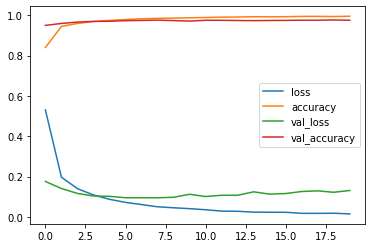

In [6]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt

plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','accuracy', 'val_loss', 'val_accuracy'])
plt.show()